<a href="https://colab.research.google.com/github/alexsantostavares/TensorflorMLP/blob/master/tensorflowalex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
#importando todas as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [253]:
#leitura do arquivo csv
df = pd.read_csv("/content/sample_data/BD-2trab(CSV) (1).csv")

In [254]:
#transformando o arquivo para linguagem compreensivel(inteiros)

df = df.replace(['$$$'],'Caro')
df = df.replace(['$$'],'Médio')
df = df.replace(['$'],'Barato')
df = df.replace(['Sim'], 1)
df = df.replace([' Sim'], 1)
df = df.replace(['Sim '], 1)
df = df.replace(['Não'], 0)
df = df.replace(['Caro'], 100)
df = df.replace(['Médio'], 50)
df = df.replace(['Barato'], 25)
df = df.replace(['Fra'], 10)
df = df.replace(['Tai'], 11)
df = df.replace(['Ham'], 12)
df = df.replace(['Ita'], 13)
df = df.replace(['0-10'], 110)
df = df.replace(['10-30'], 130)
df = df.replace(['30-60'], 160)
df = df.replace(['>60'], 190)

df = df.replace(['Alg'], 1001)
df = df.replace(['Che'], 1002)
df = df.replace(['Ne'], 1003)

In [255]:
#exibindo a tabela
df.head()

,Alternativo,Bar,Sex/Sab,Faminto,Cliente,Preço,Chove,Reserva,Tipo,Espera,Meta
0,1,0,0,1,1001,100,0,1,10,110,1
1,1,0,0,1,1002,25,0,0,11,160,0
2,0,1,0,0,1001,25,0,0,12,110,1
3,1,0,1,1,1002,25,1,0,11,130,1
4,1,0,1,0,1002,100,0,1,10,190,0


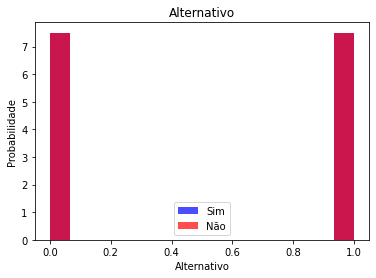

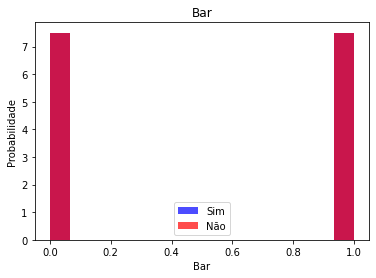

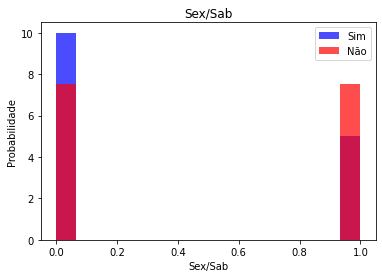

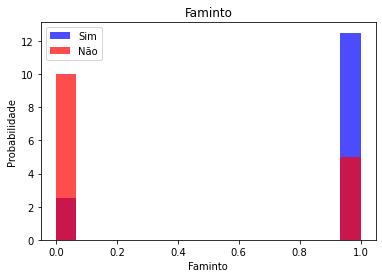

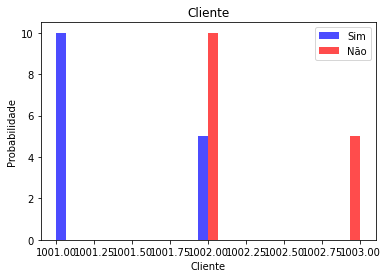

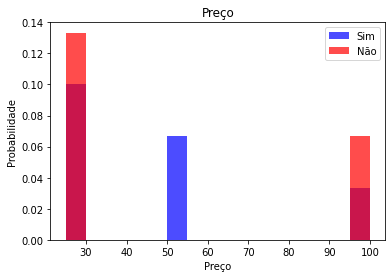

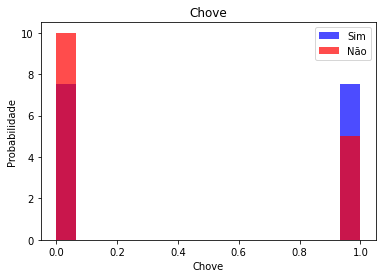

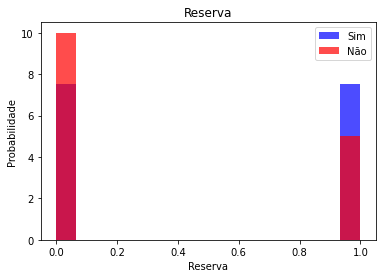

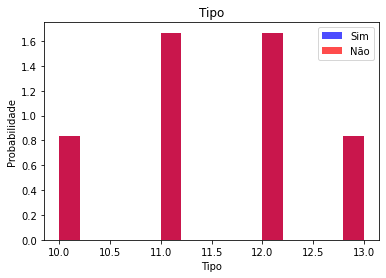

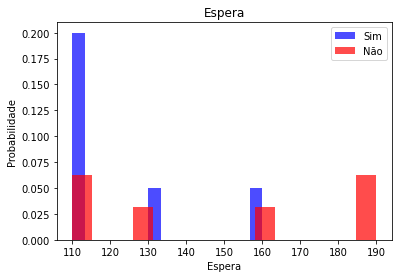

In [256]:
# mostrando todas as relações das colunas da tabela com a Meta
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Meta']== 1][label], color='blue', label="Sim", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Meta']== 0][label], color='red', label="Não", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probabilidade")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [257]:
# normalizando o formato de X e Y para que possam ser comparados
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [258]:
# Mostrando o formato
X.shape, y.shape

((12, 10), (12,))

In [259]:
# normalizando o formato de X e Y para que possam ser comparados parte 2
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [260]:
# normalizando o formato de X e Y para que possam ser comparados parte 3
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [261]:
# dispozição dos valores do meta sim,não ou 1,0
len(transformed_df[transformed_df["Meta"]==1]), len(transformed_df[transformed_df["Meta"]==0])

(6, 6)

In [262]:
# determinando os treinamentos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [263]:
# definindo a quantidade de camadas e metodo
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(24, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [264]:
# mais alguns parametros e a taxa de aprendizagem
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [265]:
# pré avaliação com variaveis de treino
model.evaluate(X_train, y_train)

1/1 [==============================] - 0s 442ms/step - loss: 0.6624 - accuracy: 0.8571


[0.6624076962471008, 0.8571428656578064]

In [266]:
# pré avaliação 2
model.evaluate(X_valid, y_valid)

1/1 [==============================] - 0s 24ms/step - loss: 0.6835 - accuracy: 0.5000


[0.6835159659385681, 0.5]

In [267]:
# treinamento
model.fit(X_train, y_train, batch_size=9, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1/1 [==============================] - 1s 700ms/step - loss: 0.6624 - accuracy: 0.8571 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6563 - accuracy: 0.8571 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6515 - accuracy: 0.8571 - val_loss: 0.6797 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6468 - accuracy: 0.8571 - val_loss: 0.6786 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6421 - accuracy: 0.8571 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 72ms/step - loss: 0.6376 - accuracy: 0.8571 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6331 - accuracy: 0.8571 - val_loss: 0.6759 - val_accuracy: 0.5000
Epoch 8/50
1/1 [==========

In [268]:
# avaliação com as variaveis separadas para teste
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.7303 - accuracy: 0.6667


[0.730290949344635, 0.6666666865348816]

In [269]:
# avaliação com todos os elementos
model.evaluate(X, y)

1/1 [==============================] - 0s 41ms/step - loss: 0.5368 - accuracy: 0.8333


[0.5368369221687317, 0.8333333134651184]